-------------------------


# Маркетинговая аналитика Яндекс.Афиши

В нашем распоряжении данные Яндекс.Афиши с июня 2017 по конец мая 2018 года. Необходимо дать рекомендации по выбору  источников трафика и перераспределения маркетингового бюджета.

В логах содержатся следущие данные:

    лог сервера с данными о посещениях сайта Яндекс.Афиши,
    выгрузка всех заказов за этот период,
    статистика рекламных расходов.

Нам предстоит изучить:

    как клиенты пользуются сервисом,
    когда делают первые покупки на сайте,
    сколько денег приносит компании каждый клиент,
    когда расходы на привлечение клиента окупаются.

Для этого мы:

    подготовим данные к анализу,
    рассчитаем метрики:
        - продуктовые
        - метрики электронной коммерции
        - маркетинговые
    сформулируем выводы и рекомендации.

-------------------------

## Шаг 1. Откроем и изучим файлы, подготовим данные к анализу

##### Прочитаем файлы с данными и изучим общую информацию, выявим проблемы

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import colors

# открываем файлы, в качестве разделителя указываем ','
try:
    visits = pd.read_csv('/datasets/visits_log.csv', sep=',')
    orders = pd.read_csv('/datasets/orders_log.csv', sep=',')
    costs = pd.read_csv('/datasets/costs.csv', sep=',')
except:
    visits= pd.read_csv('visits_log.csv', sep=',')
    orders= pd.read_csv('orders_log.csv', sep=',')
    costs= pd.read_csv('costs.csv', sep=',')

# устанавливаем отображение количества столбцов экране 
pd.options.display.max_columns = 30

#ограничим формат float 2 знаками после точки
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Давате сразу посмотрим на наши таблицы

In [2]:
#изучим первые 5 строк загруженных таблицы, информацию о них методами info() и describe()
print('\033[1mТаблица с посещениями\033[0m')
display(visits.head())
visits.info()
print('')
print ('\033[1m' + 'Вывод метода describe()' + '\033[0m')
display(visits.describe())
print('-----------------------------------')
print('\033[1mТаблица с покупками\033[0m')
display(orders.head())
orders.info()
print('')
print ('\033[1m' + 'Вывод метода describe()' + '\033[0m')
display(orders.describe())
print('-----------------------------------')
print('\033[1mТаблица с расходами на маркетинг\033[0m')
display(costs.head())
costs.info()
print('')
print ('\033[1m' + 'Вывод метода describe()' + '\033[0m')
display(costs.describe())

Таблица с посещениями


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

Вывод метода describe()


,Source Id,Uid
count,359400.00,359400.00
mean,3.75,9202556994354921472.00
std,1.92,5298432824659611648.00
min,1.00,11863502262781.00
25%,3.00,4613406732167550976.00
50%,4.00,9227412908740601856.00
75%,5.00,13728237011236171776.00
max,10.00,18446676030785673216.00


-----------------------------------
Таблица с покупками


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

Вывод метода describe()


,Revenue,Uid
count,50415.00,50415.00
mean,5.00,9098160634289729536.00
std,21.82,5285741550834715648.00
min,0.00,313578113262317.00
25%,1.22,4533566627250599936.00
50%,2.50,9102273602618561536.00
75%,4.89,13682901980465401856.00
max,2633.28,18446167067214817280.00


-----------------------------------
Таблица с расходами на маркетинг


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB

Вывод метода describe()


,source_id,costs
count,2542.00,2542.00
mean,4.86,129.48
std,3.18,156.30
min,1.00,0.54
25%,2.00,21.95
50%,4.00,77.30
75%,9.00,170.06
max,10.00,1788.28


Мы можем заметить некоторые проблемы, так **названия столбцов** не все приведены к нижнему регистру, в некоторых имеются пробелы, что может доставить неудобство. В некоторых типах данных **избыточная битность** (например в source_id битность 64 при всего 10 значениях), можно будет заменить на меньшую битность. Значения дат имеют тип объект, нужно привести к типу datetime64.  Также возможно есть **выбросы**, как в доходах от покупок (2633 при медиане в 2.50), так и в рекламных расходах (1788 при медиане 77). Зато радует, что в данных нет пропусков. Так же стоит отметить, что в выгруженных для нас данных, значения времени начала и конца сессий округлены до минут, это нужно будет учитывать в дальнейшем.

In [3]:
#сразу посмотрим нет ли ошибок в написании названий устройств
visits['Device'].unique()

array(['touch', 'desktop'], dtype=object)

О, у нас устройства поделены всего на два типа и с ними всё в порядке.

In [4]:
#дадим новые названия столбцов в нижнем регистре и без пробелов, некоторые преименуем в более понятные
visits.columns = ['device','session_end_ts', 'source_id', 'session_start_ts', 'uid']
orders.columns = ['order_ts', 'revenue', 'uid']
costs.columns = ['source_id','cost_date', 'costs']

##### Опишем данные наших таблиц

    device — устройство, с которого пользователь посещал сайт
    session_start_ts — начало пользовательской сессии
    session_end_ts — конец сессии
    source_id — источник трафика
    uid — уникальный идентификатор пользователя
    order_ts — дата и время покупки
    revenue — выручка от покупки (в у.е.)
    cost_date — дата рекламных расходов
    costs — рекламные расходы

##### Обработаем типы данных

Оптимизируем типы данных приведением к минимально подходящим. Столцбы с датой и временем приведем к формату datetime64

In [5]:
#используем понижающее приведение downcast метода pd.to_numeric() 
visits['source_id'] = pd.to_numeric(visits['source_id'], downcast='integer')
costs['source_id'] = pd.to_numeric(costs['source_id'], downcast='integer')

#в случае с float для начала методом round() округлим данные до интересующей нас точности (2 знака)
orders['revenue'] = round(orders['revenue'],2)
#используем понижающее приведение downcast
orders['revenue'] = pd.to_numeric(orders['revenue'], downcast='float')

costs['costs'] = round(costs['costs'],2)
costs['costs'] = pd.to_numeric(costs['costs'], downcast='float')

#столбцы с датой приведем к формату datetime64
visits['session_end_ts'] = pd.to_datetime(visits['session_end_ts'], format='%Y-%m-%d %H:%M')
visits['session_start_ts'] = pd.to_datetime(visits['session_start_ts'], format='%Y-%m-%d %H:%M')
orders['order_ts'] = pd.to_datetime(orders['order_ts'], format='%Y-%m-%d %H:%M')
costs['cost_date'] = pd.to_datetime(costs['cost_date'], format='%Y-%m-%d %H:%M')

In [6]:
#посмотрим на получившиеся типы данных
visits.info()
print('')
orders.info()
print('')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   device            359400 non-null  object        
 1   session_end_ts    359400 non-null  datetime64[ns]
 2   source_id         359400 non-null  int8          
 3   session_start_ts  359400 non-null  datetime64[ns]
 4   uid               359400 non-null  uint64        
dtypes: datetime64[ns](2), int8(1), object(1), uint64(1)
memory usage: 11.3+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_ts  50415 non-null  datetime64[ns]
 1   revenue   50415 non-null  float32       
 2   uid       50415 non-null  uint64        
dtypes: datetime64[ns](1), float32(1), uint64(1)
memory usage: 984.8 KB

<class 'panda

Теперь с типом данных всё хорошо.

-------------------------

## Шаг 2. Рассчитаем метрики и построим графики

### Расчет продуктовых метрик

##### Рассчитаем DAU, WAU и MAU. Вычислим средние значения этих метрик за весь период

Чтобы посчитать недельное и месячное использование, выделим в отдельные столбцы год, месяц и неделю, а также полную дату.

In [7]:
visits['session_year']  = visits['session_start_ts'].dt.year
visits['session_month'] = visits['session_start_ts'].dt.month
visits['session_week']  = visits['session_start_ts'].dt.week
visits['session_date'] = visits['session_start_ts'].dt.date
visits['session_date'] = pd.to_datetime(visits['session_date'], format="%Y-%m-%d")

<ipython-input-7-d7fbdab6af07>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  visits['session_week']  = visits['session_start_ts'].dt.week


In [8]:
#теперь рассчитаем DAU, WAU и MAU соответственно
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year','session_month']).agg({'uid': 'nunique'}).mean()

In [9]:
print('Среднее количество уникальных пользователей в день составляет:\033[1m', int(dau_total),'\033[0m')
print('-----------------------------------')
print('Среднее количество уникальных пользователей в неделю составляет:\033[1m', int(wau_total),'\033[0m')
print('-----------------------------------')
print('Среднее количество уникальных пользователей в месяц составляет:\033[1m', int(mau_total),'\033[0m')

Среднее количество уникальных пользователей в день составляет: 907 
-----------------------------------
Среднее количество уникальных пользователей в неделю составляет: 5716 
-----------------------------------
Среднее количество уникальных пользователей в месяц составляет: 23228 


Довольно большое количество уникальных пользователей. Теперь посмотрим на значение Sticky Factor, показатель лояльности пользователей, то как регулярно используется наш сайт. Кроме того, что Sticky Factor показывает пользовательскую лояльность, которая опосредованно связана с монетизацией (так как это одина из точек роста), так он ещё и является одним из факторов ранжирования в магазинах приложений Apple AppStore и Google Play. 

In [10]:
sticky_mau = dau_total/mau_total 
sticky_wau = dau_total/wau_total

print('Недельный sticky factor составляет \033[1m{:.2%}\033[0m'.format(float(sticky_wau)))
print('Месячный sticky factor составляет \033[1m{:.2%}\033[0m'.format(float(sticky_mau)))

Недельный sticky factor составляет 15.88%
Месячный sticky factor составляет 3.91%


Аналитики и маркетологи из геймдева посчитали б такие значения Sticky Factor низкими (прим. см. https://app2top.ru/marketing/devtodev-regulyarnost-vhodov-vazhnejshij-pokazatel-monetizatsii-igry-55693.html), однако Яндекс.Афиша -  это сервис, где можно узнать о событиях в городе и купить билеты в кино и на мероприятие, как правило люди редко ходят по различным мероприятиям в будние дни и вообще так часто как возможно хотелось бы. Так что месячный Sticky Factor со значением 3.91 не совсем плохой показатель.

Также давайте взглянем на распределение количества уникальных дневных пользователей во времени

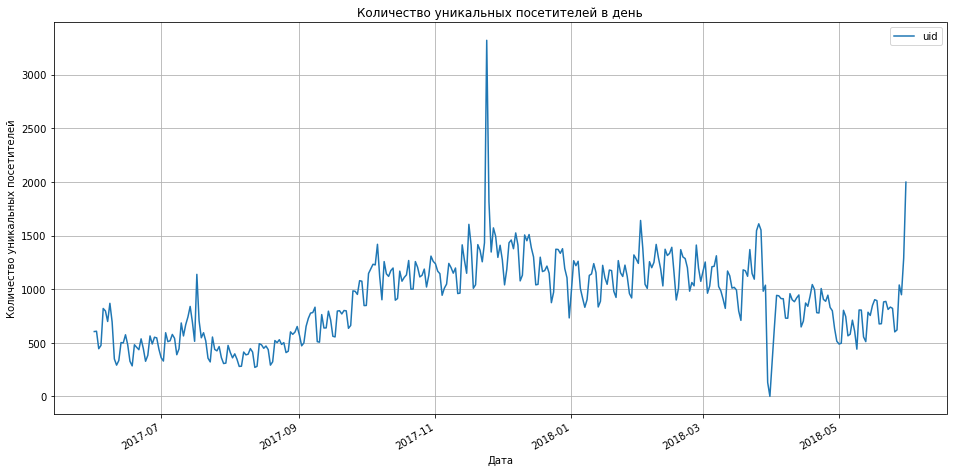

In [11]:
#группируем по дате сесии, получаем количество уникальных в день
visits.groupby('session_date').agg({'uid': 'nunique'}).plot(figsize=(16,8))
plt.ylabel('Количество уникальных посетителей')   # подпишем ось У
plt.xlabel('Дата')   # подпишем ось У
plt.title('Количество уникальных посетителей в день') # подпишем график
plt.grid()
plt.show()

В целом среднее количество уникальных дневных посетителей распределено равномерно, есть конечно большой пик в конце 2017 года и странный провал в конце марта 2018. 

In [12]:
visits_per_day = visits.groupby('session_date').agg({'uid': 'nunique'})

In [13]:
#посмотрим на даты, в которых зафиксировано экстремально низкое значение посетителей
visits_per_day[visits_per_day['uid'] < 100]

,uid
session_date,
2018-03-31,1


Всего один пользователь 31.03.2018, технические работы или ошибка выгрузки данных? Нужно передать сведения в ответственный отдел.

In [14]:
#посмотрим на даты, в которых зафиксировано экстремально высокое значение посетителей
visits_per_day[visits_per_day['uid'] > 3000]

,uid
session_date,
2017-11-24,3319


3319 уникальных пользователей 24.11.2017, конечно может все ринулись заранее покупать билеты на новогодние мероприятия, к сожалению у нас нет данных за аналогичные периоды других лет, чтобы сравнить. А может это связано с проведенной маркетинговой кампанией, узнаем это позже.

##### Определим, сколько раз за день пользователи в среднем заходят на сайт

In [15]:
#сгруппируем по пользователям и дате, посчитаем количество сесий в рамках одного дня 
visits_per_day_unique = visits.groupby(['uid','session_date']).agg({'session_date': 'count'}).mean()
print(f'Средний пользователь в среднем посещает сайт \033[1m{round(visits_per_day_unique.mean(),2)}\033[0m раз в день')

Средний пользователь в среднем посещает сайт 1.09 раз в день


Средний пользователь посещает сайт практически только раз в день, надеемся, что это значит, что большинство с первого раза достигает поставленной цели, зашли, купили, вышли.

##### Рассчитаем ASL - среднюю продолжительность сессии 

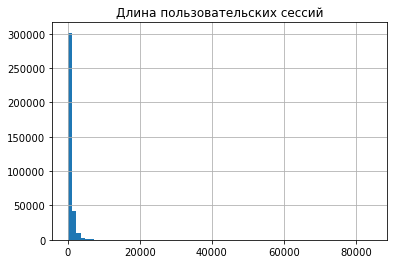

In [16]:
#рассчитаем длину сессии в секундах
visits['session_duration_sec'] = (visits['session_end_ts'] - visits['session_start_ts']).dt.seconds
#посмотрим на распределение, чтобы выбрать среднюю меру
plt.title('Длина пользовательских сессий')
visits['session_duration_sec'].hist(bins=70) 
plt.show()

Крайне ненаглядно, но для определения средней меры достаточно. У нас большое количество нулевых значений, но это не значит, что это ошибки данных, это особенность выгрузки. Как мы отмечали на этапе изучения данных, у нас отсутствуют значения секунд сессий, поэтому любые значения длительности сессий меньше минуты представлены 0. Так, наше распределение далеко от нормального, поэтому в качестве средней меры выберем моду.

In [17]:
print('Средняя продолжительность сессии на сайте:', int(visits['session_duration_sec'].mode()), 'сек.') 

Средняя продолжительность сессии на сайте: 60 сек.


Однако, ASL, в качестве выбранной метрики не показывает ничего существенного. Пользователи заходят в наш сервис, в определённое время и решают понятную задачу - покупают билеты на мероприятие. Так что небольшое время сессии это даже хорошо, если она заканчивается покупкой, это может говорить о хорошем ux/ui дизайне. Раз метрика ASL для нас недостаточно показательна, чтобы оценить эффективность нашего сервиса обратимся к Retention Rate.

##### Рассчитаем Retention Rate

Данная метрика покажет нам, сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды. То есть, как долго привлечённый пользователь пользуется сервисом, увеличивая потенциальную выручку.  

In [18]:
#сгруппируем пользователей по первой дате посещения
first_visits = visits.groupby(['uid'])['session_date'].min()
first_visits.name = 'first_visit_date'
#объединим с исходным датафреймом
visits = visits.join(first_visits,on='uid') 

Для каждого клиента мы получили дату его первого посещения. В качестве диапазона для формирования когорт возьмем месяц, для этого далее выделим месяц из даты первого посещения.

In [19]:
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')
visits['visit_month'] = visits['session_start_ts'].astype('datetime64[M]')

Вычислим lifetime - время жизни когорты

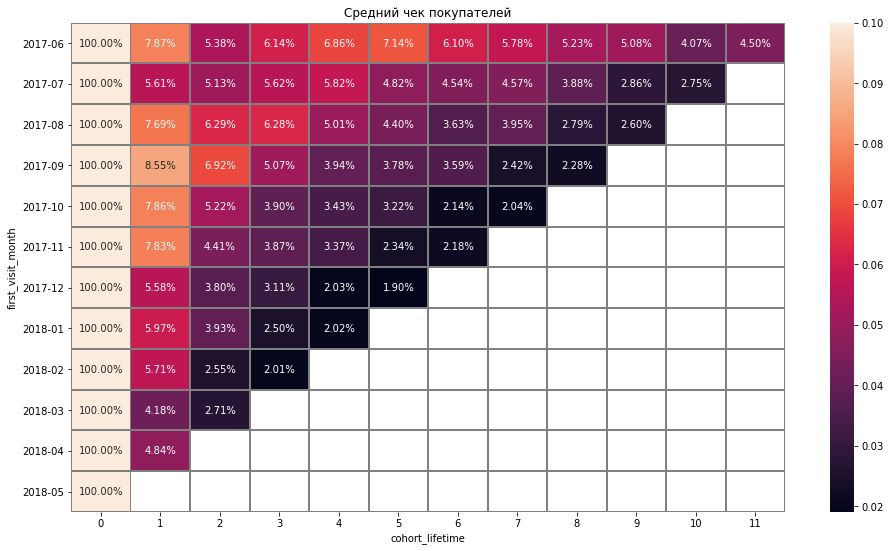

In [20]:
#отнимем месяц визита, от первого месяца посещения, затем разделим на месячную константу
visits['cohort_lifetime'] = visits['visit_month'] - visits['first_visit_month'] 
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

#сгруппируем уникальных пользователей по месяцу первого визита и времени жизни когорты
cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 

#найдём исходное количество пользователей в когорте (на нулевой месяц)
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_uid'})

#объединим с исходной группировкой
cohorts = cohorts.merge(initial_users_count, on = 'first_visit_month')
#рассчитаем Retention
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_uid']

#оставим только значение месяца и года
cohorts['first_visit_month'] = cohorts['first_visit_month'].dt.strftime('%Y-%m') 

#построим сводную таблицу 
retention_pivot = cohorts.pivot_table(index='first_visit_month', columns = 'cohort_lifetime', 
                                      values='retention',aggfunc='sum')

#посмотрим на сводную таблицу с помощью .heatmap()
plt.figure(figsize=(16, 9))
plt.title('Средний чек покупателей')
sns.heatmap(retention_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='gray', vmax=0.1)
plt.show()

Рассчитаем средний Retention Rate на второй месяц «жизни» когорт.

In [21]:
second_month_lifetime = retention_pivot.reset_index(drop=True)[1]
print('Cредний Retention Rate на второй месяц «жизни» когорт составляет \033[1m{:.2%}\033[0m'
      .format(second_month_lifetime.mean()))

Cредний Retention Rate на второй месяц «жизни» когорт составляет 6.52%


Значение Retention Rate удручает, приходит много пользователей, но повторно возвращаются мало, на первый месяц жизни когорт падение свыше 90 процентов.

-------------------------

### Расчет метрик электронной коммерции

##### Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки

In [22]:
#добудем первую дату время покупки для каждого пользователя
first_orders_ts = orders.groupby('uid').agg({'order_ts': 'min'}).reset_index()
first_orders_ts.columns = ['uid', 'first_order_ts']
first_orders_ts['first_order_ts'] = pd.to_datetime(first_orders_ts['first_order_ts'], format="%Y-%m-%d %H:%M")

#добудем время и дату первого визита для каждого пользователя
first_visits_ts = visits.groupby('uid').agg({'session_start_ts': 'min'}).reset_index()
first_visits_ts.columns = ['uid', 'first_visits_ts']
first_visits_ts['first_visits_ts'] = pd.to_datetime(first_visits_ts['first_visits_ts'], format="%Y-%m-%d %H:%M")

#объединим с исходным датафреймом
visits = visits.merge(first_visits_ts, on = 'uid')

delta_order_visit = first_visits_ts.merge(first_orders_ts,on='uid')

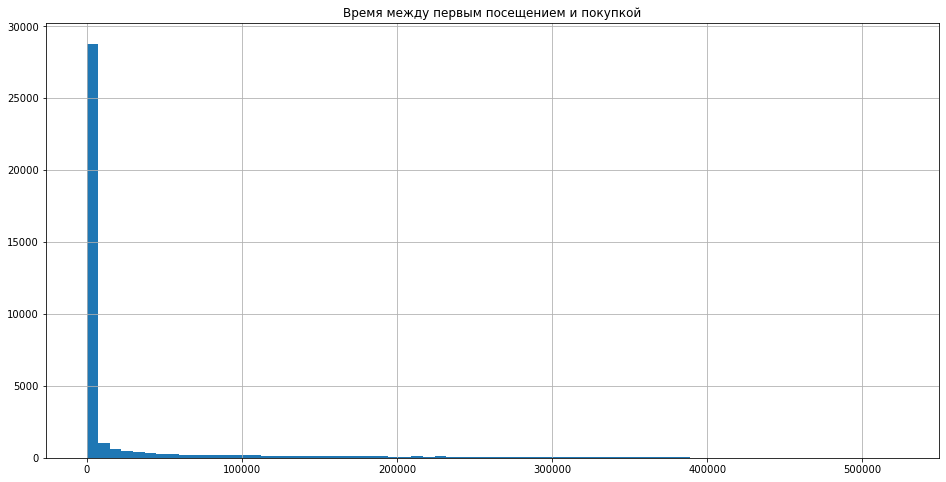

In [23]:
#создадим столбец с разницой (в дельте времени) между покупкой и визитом, разделим на константу, чтобы получить минуты
delta_order_visit['delta'] = (delta_order_visit['first_order_ts'] - delta_order_visit['first_visits_ts']) / np.timedelta64(1, 'm')

#сгруппируем по пользователям чтобы получить для каждого значение дельты времени
time_between_visit_order = delta_order_visit.groupby(['uid'])['delta'].unique().reset_index()

#приведем столбец к числовому типу данных
time_between_visit_order['delta'] = time_between_visit_order['delta'].astype('float32')

#посмотрим на распределение, чтобы выбрать среднюю меру
plt.figure(figsize=(16, 8))
plt.title('Время между первым посещением и покупкой')
time_between_visit_order['delta'].hist(bins=70) 
plt.show()

У нас большое количество значений сгруппировано в районе 0 и 1. Как мы помним, у нас в данных округлены значения секунд. поэтому нет значений, скажем например 45 секунд. Итак, наше распределение далеко от нормального, имеются выбросы, но маловероятно, что наш пользователь пол днявыбирает мероприятие, так что открытый и забытый сайт в браузере не может являться адекватным показателем. Поэтому в качестве средней меры выберем моду.

In [24]:
time_mode = time_between_visit_order['delta'].mode()
print(f'С момента первого посещения сайта до совершения покупки в среднем проходит {time_mode} минут')

С момента первого посещения сайта до совершения покупки в среднем проходит 0   1.00
dtype: float32 минут


Тут мы видем явную связь с метрикой ASL. Действительно пользователи заходят в наш сервис и решают понятную задачу - в течении минуты покупают билеты на мероприятие. И делают это быстро. Это радует, что пользователи, посетившие сайт впервые так быстро осуществляют покупку. Также возможно это особенность маркетинговой кампании и выбор мероприятия и заполнение необходимых сведений осуществляется на партнерских платформах, затем редирект и покупка.

##### Исследуем среднее количество покупок на одного покупателя за 6 месяцев

Построим когортный отчет с даты первой покупки, для этого:

In [25]:
#добавим в покупки месяц покупки
orders['order_month'] = orders['order_ts'].astype('datetime64[M]')

#получим для каждого пользователя месяц его первой покупки (это и будет когортой)
first_order_month = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_order_month.columns = ['uid', 'first_order_month']

#объединим покупки с датой первой покупки
orders_first_month = orders.merge(first_order_month, on = 'uid')

#сформируем когорту по первому месяцу, посчитаем количество покупок по id
cohorts_count_pur = orders_first_month.groupby(['first_order_month','order_month']).agg({'revenue':'count'}).reset_index()
cohorts_count_pur.columns = ['first_order_month', 'order_month', 'count_purchase']

#добавим возраст когорты, в месяцах, округлим и представим в целочисленном виде 
cohorts_count_pur['age'] = (cohorts_count_pur['order_month'] - cohorts_count_pur['first_order_month']) / np.timedelta64(1, 'M')
cohorts_count_pur['age'] = cohorts_count_pur['age'].round().astype('int')

#посчитаем общее количество пользователей в когорте 
cohort_sizes = orders_first_month.groupby(['first_order_month','order_month']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month','order_month','n_buyers']

#присоединим количество пользователей для каждой когорты 
report = pd.merge(cohorts_count_pur, cohort_sizes, on=['first_order_month','order_month'])

#посчитаем количество покупок на 1 покупателя в каждом месяце жизни когорты
report['purchases_per_buyer'] = report['count_purchase'] / report['n_buyers']

#оставим только значение месяца и года в когорте, для красоты
report['first_order_month'] = report['first_order_month'].dt.strftime('%Y-%m') 

#строки - когорта (первый месяц покупки), столбцы - lifetime, значение - среднее количество помесячных покупок 
output_count_pur = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='purchases_per_buyer', 
    aggfunc='mean')
display(output_count_pur.fillna('')) #выведем pivot_table, заполним пустые значения пробелами

#рассчитаем накопительные усредненные значения количества покупок когорт за 6 месяцев после первой покупки
m6_cum_purchases = output_count_pur.cumsum(axis=1).mean(axis=0)[5]
print('Cреднее количество покупок на одного покупателя c момента первой покупки за 6 месяцев {:.2f} покупок'
      .format(m6_cum_purchases))

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,1.16,2.90,3.48,4.19,3.32,3.25,4.45,3.70,3.66,3.40,2.13,1.62
2017-07,1.14,1.92,2.11,1.62,1.47,2.16,1.69,1.28,1.38,1.09,2.04,
2017-08,1.12,1.86,1.89,1.84,2.12,1.94,1.63,1.77,2.42,1.48,,
2017-09,1.14,1.68,1.61,2.22,1.29,1.70,1.64,1.51,1.42,,,
2017-10,1.14,1.52,1.32,1.33,1.39,1.43,1.54,1.87,,,,
2017-11,1.18,1.79,1.52,1.99,1.68,1.23,1.65,,,,,
2017-12,1.15,1.85,1.96,1.85,1.72,1.67,,,,,,
2018-01,1.12,1.96,1.92,1.49,1.73,,,,,,,
2018-02,1.12,1.88,1.43,1.79,,,,,,,,


Cреднее количество покупок на одного покупателя c момента первой покупки за 6 месяцев 10.98 покупок


Если клиент нас не покидает после первой покупки и остается в нашем в сервисе, то он продолжает делать в среднем 1-2 покупки в месяц. Так среднее количество покупок **на одного покупателя** c момента первой покупки за **6 месяцев** составляет почти **11 покупок**, с учетом специфики предоставляемого продукта это довольно хороший показатель.  Надо работать над удержанием клиентов.

##### Рассчитаем средний чек AOV

In [26]:
#для интереса посчитаем суммарный чек
sum_rev = orders['revenue'].sum()
print('')
print('-------------------------------------')
print('\033[1mОбщая выручка за наш период',sum_rev,'\033[0m')
print('-------------------------------------')

#сформируем когорту по первому месяцу покупки, посчитаем сумму прибыли
cohorts_rev = orders_first_month.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

#присоединим количество пользователей (рассчитывали ранее) для каждой когорты
report = pd.merge(cohorts_rev, cohort_sizes, on=['first_order_month','order_month'])

#добавим возраст когорты, в месяцах, округлим и представим в целочисленном виде 
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

#посчитаем чек на 1 покупателя в каждом месяце жизни когорты
report['revenue_per_buyer'] = report['revenue'] / report['n_buyers']

#оставим только значение месяца и года в когорте, для красоты
report['first_order_month'] = report['first_order_month'].dt.strftime('%Y-%m') 

#строки - когорта (первый месяц покупки), столбцы - lifetime, значение - средний чек
output_rev = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='revenue_per_buyer', 
    aggfunc='mean')
display(output_rev.fillna('')) #выведем pivot_table, заполним пустые значения пробелами

#рассчитаем накопительное усредненное значение среднего чека за 6 месяцев 
m6_cum_rev = output_rev.cumsum(axis=1).mean(axis=0)[5]
print('Cреднее количество покупок на одного покупателя c момента первой покупки за 6 месяцев {:.2f} покупок'
      .format(m6_cum_rev))


-------------------------------------
Общая выручка за наш период 252057.2 
-------------------------------------


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.72,16.10,17.71,35.76,23.51,22.21,31.01,25.03,19.30,27.23,25.68,9.80
2017-07,6.01,12.40,21.04,10.79,6.94,7.90,6.42,6.99,7.38,12.86,11.51,
2017-08,5.28,11.15,11.85,12.18,16.92,12.14,9.62,12.61,21.07,8.31,,
2017-09,5.64,22.19,13.45,138.67,19.88,26.10,27.44,16.96,11.04,,,
2017-10,5.00,11.29,6.75,7.41,7.07,7.26,6.57,7.48,,,,
2017-11,5.15,7.34,6.79,12.51,7.46,4.58,7.56,,,,,
2017-12,4.74,7.82,39.37,48.14,27.43,23.52,,,,,,
2018-01,4.14,8.72,12.37,11.20,4.70,,,,,,,
2018-02,4.16,8.61,4.94,6.94,,,,,,,,


Cреднее количество покупок на одного покупателя c момента первой покупки за 6 месяцев 102.88 покупок


AOV коррелирует со средним количеством покупок на 1 пользователя, пользователи со второго месяца жизни когорт наряду с увеличением количества покупок увеличивают и средний чек. Значит им нравится наш сервис, так что действительно выгодно удерживать пользователей на платформе.

##### Рассчитаем LTV на покупателя по когортам

In [27]:
#посчитаем общее количество пользователей всей когорты
cohort_sizes_all = orders_first_month.groupby(['first_order_month']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes_all.columns = ['first_order_month','all_buyers']

report = pd.merge(cohorts_rev, cohort_sizes_all, on=['first_order_month'])

#добавим возраст когорты, в месяцах, округлим и представим в целочисленном виде 
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

#добавим столбец с валовой прибылью (умножим прибыль на маржинальность)
margin_rate = 1 #маржинальность 100 процентов
report['gp'] = report['revenue'] * margin_rate

#рассчитаем LTV
report['ltv'] = report['gp'] / report['all_buyers']

#строки - когорта (первый месяц покупки), столбцы - lifetime, значение - среднее значение LTV
output_ltv = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean')
print('')
print('--------------------------------------------------------------------')
print('\033[1mСреднее значение LTV пользователей по месяцам жизни когорт\033[0m')
display(output_ltv.fillna('')) #выведем pivot_table, заполним пустые значения пробелами 

print('')
print('--------------------------------------------------------------------')
print('\033[1mСреднее значение LTV пользователей по месяцам жизни когорт в накопительном представлении\033[0m')
output_cum_ltv = output_ltv.cumsum(axis=1)
display(output_cum_ltv.fillna('')) #выведем pivot_table, заполним пустые значения пробелами 
 
print('')
print('--------------------------------------------------------------------')
print('\033[1mСреднее значение LTV по когортам за 6 месяцев\033[0m')
m6_cum_ltv = output_ltv.cumsum(axis=1)[5].dropna()
display(m6_cum_ltv)



--------------------------------------------------------------------
Среднее значение LTV пользователей по месяцам жизни когорт


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.40,0.65,0.70,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.40,0.20,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.30,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,



--------------------------------------------------------------------
Среднее значение LTV пользователей по месяцам жизни когорт в накопительном представлении


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.50,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.40,,,,,
2017-12-01,4.74,5.00,5.92,6.99,7.30,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,



--------------------------------------------------------------------
Среднее значение LTV по когортам за 6 месяцев


first_order_month
2017-06-01    8.36
2017-07-01    7.66
2017-08-01    7.38
2017-09-01   12.31
2017-10-01    6.16
2017-11-01    6.28
2017-12-01    7.64
Name: 5, dtype: float64

Значения LVT коррелируют со значениями среднего чека AOV и со средним количеством покупок на 1 пользователя. Так LTV со второго месяца жизни когорт прирастает медленно. За 6 месяцев лучше всего показала себя когорта 2017-09, также хорошие показатели у 2017-06 (в том числе за все 12 месяцев жизни).

-------------

### Расчет маркетинговых метрик

##### Посчитаем общую сумму расходов на маркетинг

In [28]:
#общая сумма за весь период
sum_cost = costs['costs'].sum()
print('')
print('-------------------------------------')
print('Общая сумма расходов на маркетинг за наш период\033[1m',sum_cost,'\033[0m')
print('-------------------------------------')


-------------------------------------
Общая сумма расходов на маркетинг за наш период 329131.6 
-------------------------------------


Общая сумма трат на маркетинг превышает суммарную выручку из нашей таблицы заказов (252057.2), возможно наш сервис является планово-убыточным и инвестирует всё в маркетинг и развитие. Теперь давайте посморим траты по источникам.

###### Посчитаем общую сумму расходов на маркетинг по источникам

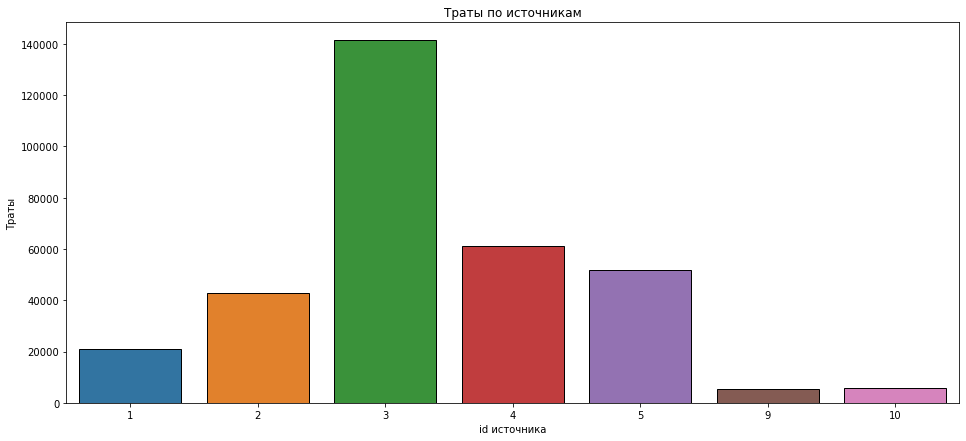

In [29]:
#сгруппируем по источникам и проссуммируем траты
costs_per_source = costs.groupby(['source_id'])['costs'].sum().reset_index()

#нарисуем график
plt.figure(figsize=(16,7))
sns.barplot(data=costs_per_source, x='source_id', y='costs', edgecolor="black")
plt.title("Траты по источникам")
plt.xlabel("id источника")
plt.ylabel("Траты")
plt.show()

На третий источник трафика приходится львиная доля расходов на маркетинг. Так как у нас не так уж и много источников, давайте посмотрим долю расходов по ним в круговой диаграмме. 

<div style="border:solid green 2px; padding: 20px" > <font size="6" face="Arial" style="color:green; margin-bottom:20px">Комментарий ревьювера <font size="3" color='green'> 

<div class="alert alert-block alert-success">
<b>Все ОК:</b> Расходы на маркетинг определны корректно!

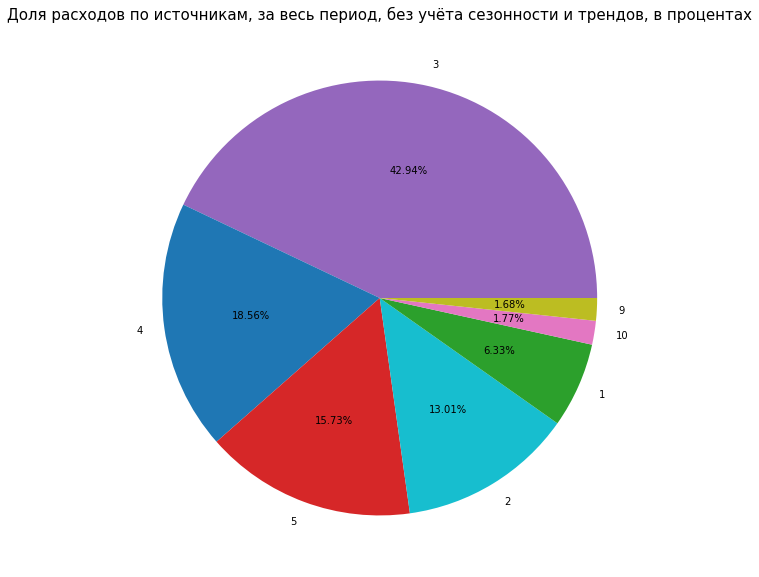

In [30]:
plt.figure(figsize = (10,10))
ratings = costs.groupby('source_id')['costs'].sum().sort_values(ascending = False)
labels=ratings.index 
colors = ['tab:purple','tab:blue','tab:red','tab:cyan', 'tab:green', 'tab:pink', 'tab:olive'] #задаем цвета
sizes = ratings.values 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%')#строим круговую диаграмму
plt.title('Доля расходов по источникам, за весь период, без учёта сезонности и трендов, в процентах',fontsize = 15)
plt.show()

На третий источник трафика пришлось 42.94%  расходов на маркетинг.  На 4, 5 и 2 - 18.56%, 15.73%, 13.01% соответственно. Чуть позже мы рассчитаем ROMI в разрезе источников и узнаем, как окупились инвестиции в маркетинг.

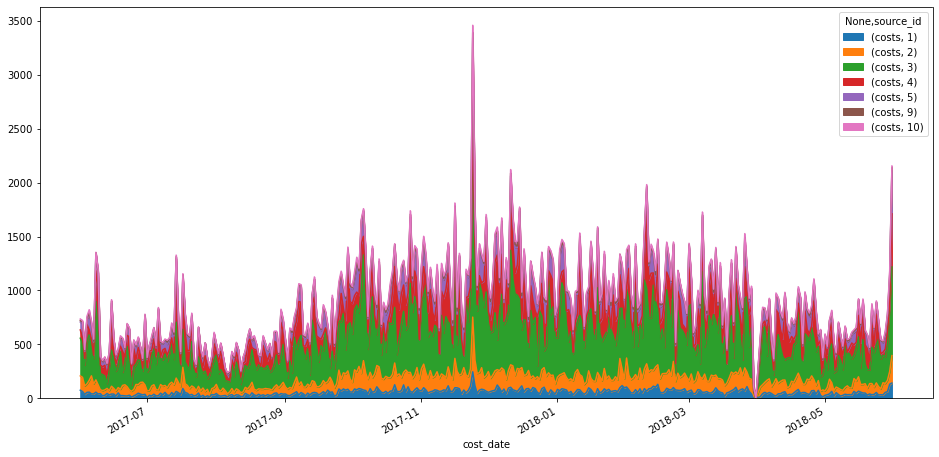

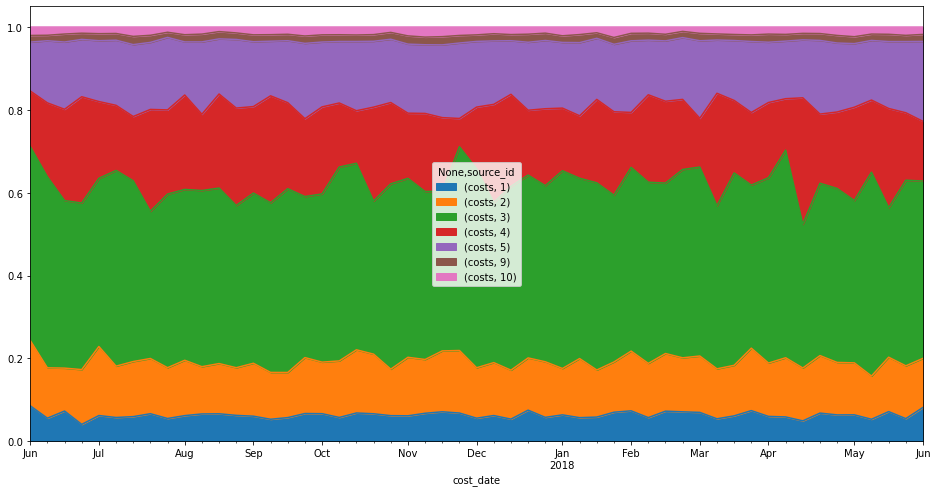

In [31]:
costs.groupby(['cost_date', 'source_id'], as_index=False).agg({'costs': 'sum'})\
        .pivot('cost_date', 'source_id')\
            .plot(kind='area', figsize=(16, 8))

plt.show()

#чтобы график не был рваным, сделаем ресемплинг по неделям
cost_norm = costs.groupby(['cost_date', 'source_id'], as_index=False).agg({'costs': 'sum'})\
                                                              .pivot('cost_date', 'source_id').resample('W').sum()
cost_norm = cost_norm.div(cost_norm.sum(axis=1), axis=0)
cost_norm.plot(kind='area', figsize=(16, 8))
plt.show()

###### Посчитаем общую сумму расходов на маркетинг по времени

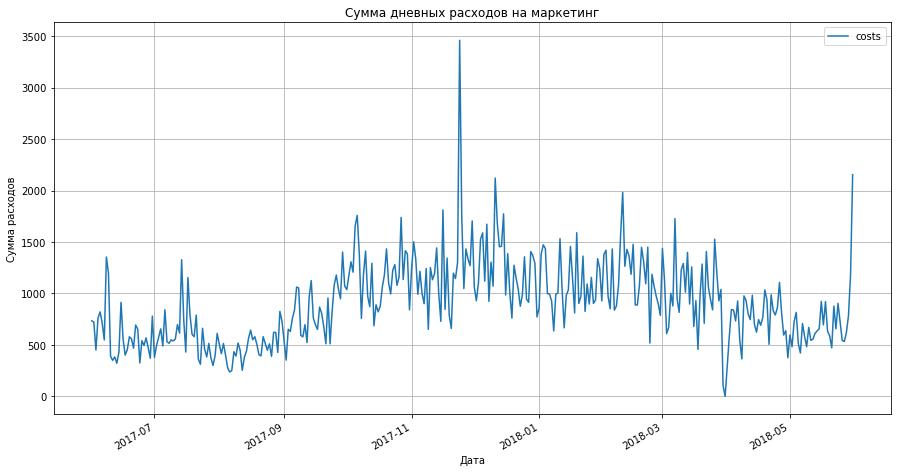

In [32]:
costs_per_day = costs.groupby('cost_date').agg({'costs': 'sum'})

costs_per_day.plot(figsize=(15,8))
plt.ylabel('Сумма расходов')   # подпишем ось У
plt.xlabel('Дата')   # подпишем ось У
plt.title('Сумма дневных расходов на маркетинг') # подпишем график
plt.grid()
plt.show()

График получился очень похожим на график количества посетителей в день, который мы строили в шаге 1.2.1. Падение посетителей в конце марта 2018 совпадает с наименьшими расходами на маркетинг. Пристутствует также пиковое значение в конце ноября 2017 года. Тогда одно из предположений было, что пиковое значение пользователей может быть связано с маркетинговой кампанией. Давайте уточним, совпадают ли даты.

In [33]:
#посмотрим на даты, в которых зафиксировано экстремально высокое значение расходов
costs_per_day[costs_per_day['costs']>2500].reset_index()['cost_date']

0   2017-11-24
Name: cost_date, dtype: datetime64[ns]

In [34]:
#посмотрим на даты, в которых зафиксировано экстремально высокое значение посетителей
visits_per_day[visits_per_day['uid'] > 3000].reset_index()['session_date']

0   2017-11-24
Name: session_date, dtype: datetime64[ns]

Действительно, даты совпали, теперь мы можем сказать, что столь большое количество посетителей 24.11.2017 связано с проведенной в тот день маркетинговой кампанией. 

##### Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика

Так как CAC это стоимость привлечения клиента, то для того, чтобы посчитать средний CAC для всего проекта, поделим общие расходы проекта на количество уникальных покупателей.

In [35]:
summ_cac = sum_cost/len(orders['uid'].unique())
print('Общий CAC проекта составляет \033[1m{:.2f}\033[0m'.format(summ_cac))

Общий CAC проекта составляет 9.01


Для рассчета CAC для каждого источника трафика нам нужно будет узнать количество покупателей для источника. Но так как один и тот же пользователь мог заходить на сайт из нескольких источников, в качестве «главного» источника определим первый источник перехода.

In [36]:
#создадим срез с сессиями, совпадающими с датой первого визита
first_visits = visits[visits['first_visits_ts'] == visits['session_start_ts']]
#создадим таблицу соотнесения uid и главного источника
first_source = first_visits[['uid','source_id']].drop_duplicates()

#создадим таблицу с покупками, объединенную с первыми источниками трафика по пользователям
buyers = orders.merge(first_source, on = 'uid')

#посчитаем количество покупателей для каждого источника
source_sizes = buyers.groupby('source_id').agg({'uid': 'nunique'}).reset_index()
source_sizes.columns = ['source_id', 'n_buyers_source']
#посмотрим на получившийся датафрейм
source_sizes

,source_id,n_buyers_source
0,1,2899
1,2,3506
2,3,10473
3,4,10296
4,5,6931
5,7,1
6,9,1088
7,10,1329


Обратим внимание, что количество пришедших пользователей у 3 и 4 источника практически равно, хотя как мы видели выше на 3 источник было затрачено больше денежных средств. Также тут у нас появился источник трафика с 1 покупателем. При этом, как мы помним, в таблице с маркетинговыми расходами отсутствовал источник трафика под с ID 7. Этот источник не будем брать во внимание при расчетах CAC.

Для того чтобы посчитать CAC для каждого источника трафика, поделим расходы на каждый источник трафика на количество  уникальных покупателей в каждом источнике.

In [37]:
#присоединим количество покупателей  к таблице с общими расходами по источнику
costs_per_source = costs_per_source.merge(source_sizes, on='source_id')

In [38]:
#рассчитаем CAC по источникам
costs_per_source['source_cac'] = costs_per_source['costs'] / costs_per_source['n_buyers_source']
#выведем таблицу
costs_per_source

,source_id,costs,n_buyers_source,source_cac
0,1,20833.27,2899,7.19
1,2,42806.04,3506,12.21
2,3,141321.62,10473,13.49
3,4,61073.60,10296,5.93
4,5,51757.10,6931,7.47
5,9,5517.49,1088,5.07
6,10,5822.49,1329,4.38


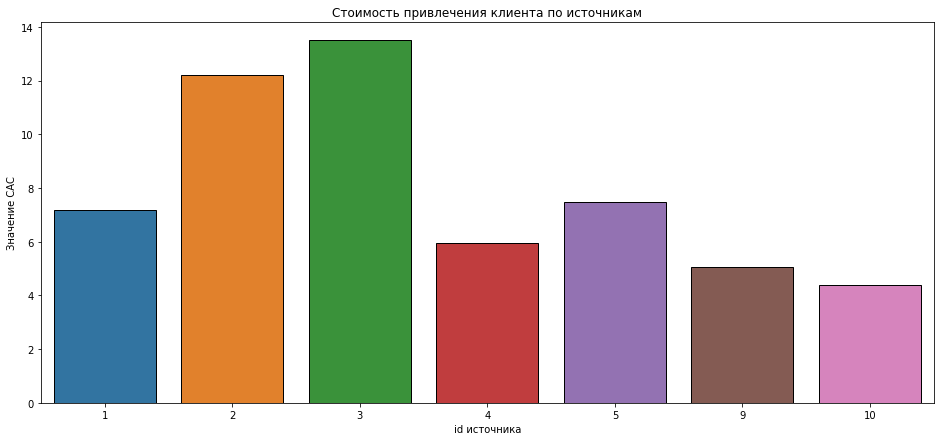

In [39]:
#нарисуем график САС
plt.figure(figsize=(16,7))
sns.barplot(data=costs_per_source, x='source_id', y='source_cac', edgecolor="black")
plt.title("Стоимость привлечения клиента по источникам")
plt.xlabel("id источника")
plt.ylabel("Значение CAC")
plt.show()

Как мы видим, проведенная маркетинговая кампания по 4 источнику успешна - стоимость привлечения клиента ниже, чем у 1,2,3 и 5 источников. Кроме того 4 источник привел почти столько же клиентов (10296), как и 3 (10473).

##### Рассчитаем ROMI по когортам в разрезе источников

ROMI это возврат на маркетинговые инвестиции, для его получения нам нужно поделить LTV на CAC. До этого момента мы рассмотривали как меняется во времени LTV на покупателя по когортам, но без разреза по источникам, поэтому сначала рассчитаем LTV, потому что клиенты, пришедшие из разных источников, могут иметь разный LTV.


In [40]:
#удалим столбец с полной датой и временем. Используем df buyers, потому что он уже содержит главные источники source_id
buyers = buyers.drop(['order_ts'], axis=1)   

In [41]:
#получим для каждого пользователя месяц его первой покупки
first_order_month = buyers.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_order_month.columns = ['uid', 'first_order_month']

In [42]:
#присоединим к таблице первый месяц покупки пользователя 
buyers = buyers.merge(first_order_month, on = 'uid')

In [43]:
# найдем в каждой когорте количество уникальных пользователей по каждому главному источнику
cohort_sizes = buyers.groupby(['first_order_month','source_id']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'source_id', 'n_buyers']

In [44]:
#сформируем когорту по первому месяцу, главному источнику, посчитаем количество покупок по id
cohorts_pur_sum = buyers.groupby(['first_order_month','order_month','source_id']).agg({'revenue':'sum'}).reset_index()
cohorts_pur_sum.columns = ['first_order_month', 'order_month','source_id', 'sum_revenue']

In [45]:
#создадим таблицу в которой расчитаем ltv
report_ltv = pd.merge(cohorts_pur_sum, cohort_sizes, on=['first_order_month','source_id'])

In [46]:
#рассчитаем валовую прибыль, возраст когорт, ltv
report_ltv['gp'] = report_ltv['sum_revenue'] * margin_rate #маржинальность определяли ранее
report_ltv['age'] = (report_ltv['order_month'] - report_ltv['first_order_month']) / np.timedelta64(1, 'M')
report_ltv['age'] = report_ltv['age'].round().astype('int')
report_ltv['ltv'] = report_ltv['gp'] / report_ltv['n_buyers']

In [47]:
#рассчитаем сумму месячных расходов по источникам, для этого сначала добавим месяц платежа
costs['month'] = costs['cost_date'].astype('datetime64[M]')
monthly_costs = costs.groupby(['month','source_id']).agg({'costs':'sum'}).reset_index()

In [48]:
#присоединим полученные месячные расходы по источникам к таблице с месячным ltv по источникам
report_romi = pd.merge(report_ltv, monthly_costs, 
                       left_on=['first_order_month','source_id'], right_on=['month','source_id'])

In [49]:
#для расчета САС по источникам поделим значения расходов на количество покупателей
report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']

#рассчитаем ROMI
report_romi['romi'] = report_romi['ltv'] / report_romi['cac']


In [50]:
#создадим список источников, и проитерируемся по нему циклом
source_list = report_romi['source_id'].unique()
for count in source_list:
    query = report_romi[report_romi['source_id']==count] #срез df с нужным источником
    pivot = query.pivot_table(  #сформируем сводную таблицу 
        index='first_order_month', #месяц первой покупки - когорта
        columns='age', # в колонках lifetime когорты
        values='romi', # значения - ROMI
        aggfunc='mean') 
    print('')
    print('----------------------------------------------------------------------------------------')
    print(f'Таблица окупаемости когорт по времени жизни для источника № {count}')
    display(pivot.cumsum(axis=1).fillna('')) #так как ROMI накопительная метрика используем .cumsum()
    print('')
    print(f'Окупаемость за 6 месяцев жизни когорт источника № {count}')
    pivot_6 = pivot.cumsum(axis=1)[5].dropna() #выведем окупаемость за определенный период - полгода
    display(pd.DataFrame(pivot_6))
    print('')
    print(f'Окупаемость средней когорты источника № {count}')
    mean_cohort = pd.DataFrame(pivot.cumsum(axis=1).mean(axis=0))
    mean_cohort.columns = ['romi']
    mean_cohort = mean_cohort.reset_index()
    display(mean_cohort)#выведем окупаемость средней когорты по периодам жизни



----------------------------------------------------------------------------------------
Таблица окупаемости когорт по времени жизни для источника № 1


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.22,1.59,1.97,2.60,3.32,3.67,4.10,4.53,4.91,5.19,5.40,5.68
2017-07-01,1.09,1.25,2.05,2.27,2.41,2.54,2.61,2.70,2.83,2.98,3.12,
2017-08-01,0.89,1.03,1.15,1.27,1.39,1.47,1.55,1.86,2.13,2.22,,
2017-09-01,0.91,1.18,1.27,1.41,1.41,1.43,1.44,1.49,1.57,,,
2017-10-01,0.88,1.04,1.07,1.13,1.14,1.16,1.18,1.23,,,,
2017-11-01,0.98,1.06,1.18,1.30,1.32,1.34,1.35,,,,,
2017-12-01,0.65,0.69,0.73,0.77,0.77,0.78,,,,,,
2018-01-01,0.63,0.64,0.65,0.76,0.76,,,,,,,
2018-02-01,0.58,0.71,0.72,0.76,,,,,,,,



Окупаемость за 6 месяцев жизни когорт источника № 1


,5
first_order_month,
2017-06-01,3.67
2017-07-01,2.54
2017-08-01,1.47
2017-09-01,1.43
2017-10-01,1.16
2017-11-01,1.34
2017-12-01,0.78



Окупаемость средней когорты источника № 1


,age,romi
0,0,0.89
1,1,1.05
2,2,1.26
3,3,1.36
4,4,1.57
5,5,1.77
6,6,2.04
7,7,2.36
8,8,2.86
9,9,3.46



----------------------------------------------------------------------------------------
Таблица окупаемости когорт по времени жизни для источника № 2


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.43,0.48,0.50,0.69,0.85,0.94,1.10,1.24,1.37,1.44,1.57,1.61
2017-07-01,0.75,0.82,0.83,0.85,0.89,0.91,0.94,0.95,0.96,0.98,1.01,
2017-08-01,0.39,0.45,0.47,0.48,0.52,0.52,0.53,0.56,0.56,0.56,,
2017-09-01,0.61,1.21,1.39,1.46,1.56,1.63,1.88,1.94,1.98,,,
2017-10-01,0.63,0.83,0.88,0.93,0.97,0.99,1.00,1.02,,,,
2017-11-01,0.53,0.60,0.63,0.69,0.72,0.73,0.74,,,,,
2017-12-01,0.69,0.81,1.53,2.39,2.63,2.88,,,,,,
2018-01-01,0.31,0.38,0.50,0.52,0.54,,,,,,,
2018-02-01,0.35,0.40,0.42,0.44,,,,,,,,



Окупаемость за 6 месяцев жизни когорт источника № 2


,5
first_order_month,
2017-06-01,0.94
2017-07-01,0.91
2017-08-01,0.52
2017-09-01,1.63
2017-10-01,0.99
2017-11-01,0.73
2017-12-01,2.88



Окупаемость средней когорты источника № 2


,age,romi
0,0,0.55
1,1,0.63
2,2,0.78
3,3,0.94
4,4,1.09
5,5,1.23
6,6,1.03
7,7,1.14
8,8,1.22
9,9,0.99



----------------------------------------------------------------------------------------
Таблица окупаемости когорт по времени жизни для источника № 3


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.36,0.37,0.39,0.41,0.43,0.44,0.45,0.46,0.46,0.47,0.47,0.47
2017-07-01,0.41,0.42,0.43,0.46,0.46,0.47,0.47,0.48,0.48,0.49,0.49,
2017-08-01,0.28,0.29,0.30,0.31,0.32,0.32,0.32,0.33,0.33,0.34,,
2017-09-01,0.44,0.46,0.48,0.49,0.51,0.51,0.52,0.53,0.54,,,
2017-10-01,0.35,0.38,0.39,0.40,0.41,0.41,0.41,0.42,,,,
2017-11-01,0.32,0.33,0.34,0.35,0.35,0.35,0.36,,,,,
2017-12-01,0.34,0.35,0.36,0.37,0.38,0.38,,,,,,
2018-01-01,0.28,0.29,0.30,0.31,0.31,,,,,,,
2018-02-01,0.29,0.31,0.32,0.33,,,,,,,,



Окупаемость за 6 месяцев жизни когорт источника № 3


,5
first_order_month,
2017-06-01,0.44
2017-07-01,0.47
2017-08-01,0.32
2017-09-01,0.51
2017-10-01,0.41
2017-11-01,0.35
2017-12-01,0.38



Окупаемость средней когорты источника № 3


,age,romi
0,0,0.34
1,1,0.36
2,2,0.37
3,3,0.38
4,4,0.39
5,5,0.41
6,6,0.42
7,7,0.44
8,8,0.45
9,9,0.43



----------------------------------------------------------------------------------------
Таблица окупаемости когорт по времени жизни для источника № 4


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.56,0.56,0.58,0.64,0.77,0.95,1.11,1.14,1.17,1.26,1.41,1.42
2017-07-01,0.81,0.82,0.83,0.86,0.86,0.87,0.89,0.89,0.91,0.92,0.92,
2017-08-01,0.53,0.55,0.56,0.59,0.61,0.63,0.64,0.66,0.67,0.68,,
2017-09-01,0.54,0.60,0.63,0.66,0.67,0.70,0.84,0.87,0.88,,,
2017-10-01,0.80,0.82,0.85,0.87,0.89,0.91,0.93,0.94,,,,
2017-11-01,1.12,1.26,1.29,1.38,1.42,1.43,1.48,,,,,
2017-12-01,0.75,0.76,0.78,0.80,0.80,0.82,,,,,,
2018-01-01,0.67,0.69,0.71,0.72,0.72,,,,,,,
2018-02-01,0.79,0.81,0.82,0.82,,,,,,,,



Окупаемость за 6 месяцев жизни когорт источника № 4


,5
first_order_month,
2017-06-01,0.95
2017-07-01,0.87
2017-08-01,0.63
2017-09-01,0.70
2017-10-01,0.91
2017-11-01,1.43
2017-12-01,0.82



Окупаемость средней когорты источника № 4


,age,romi
0,0,0.76
1,1,0.78
2,2,0.79
3,3,0.81
4,4,0.84
5,5,0.90
6,6,0.98
7,7,0.90
8,8,0.90
9,9,0.95



----------------------------------------------------------------------------------------
Таблица окупаемости когорт по времени жизни для источника № 5


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.73,0.86,0.92,1.05,1.15,1.19,1.33,1.41,1.49,1.63,1.66,1.67
2017-07-01,0.75,0.79,0.86,0.88,0.89,0.91,0.91,0.92,0.94,0.95,0.96,
2017-08-01,0.83,0.96,1.09,1.21,1.39,1.49,1.55,1.59,1.63,1.67,,
2017-09-01,0.95,0.98,1.03,3.50,3.62,3.93,3.97,4.00,4.00,,,
2017-10-01,0.83,0.87,0.89,0.91,0.93,0.95,0.97,0.99,,,,
2017-11-01,0.50,0.52,0.53,0.54,0.55,0.56,0.57,,,,,
2017-12-01,0.66,0.68,0.69,0.69,0.70,0.70,,,,,,
2018-01-01,0.51,0.57,0.62,0.62,0.63,,,,,,,
2018-02-01,0.58,0.59,0.60,0.60,,,,,,,,



Окупаемость за 6 месяцев жизни когорт источника № 5


,5
first_order_month,
2017-06-01,1.19
2017-07-01,0.91
2017-08-01,1.49
2017-09-01,3.93
2017-10-01,0.95
2017-11-01,0.56
2017-12-01,0.70



Окупаемость средней когорты источника № 5


,age,romi
0,0,0.66
1,1,0.72
2,2,0.78
3,3,1.11
4,4,1.23
5,5,1.39
6,6,1.55
7,7,1.78
8,8,2.02
9,9,1.42



----------------------------------------------------------------------------------------
Таблица окупаемости когорт по времени жизни для источника № 9


age,0,1,2,3,4,5,6,7,8,9,10
first_order_month,,,,,,,,,,,
2017-06-01,0.85,0.87,1.01,1.15,1.22,1.32,1.45,1.48,1.61,1.64,1.66
2017-07-01,0.77,0.80,0.90,0.99,1.05,1.06,1.11,1.12,1.19,1.20,1.21
2017-08-01,1.00,1.05,1.20,1.26,1.27,1.29,1.32,1.40,1.42,1.45,
2017-09-01,0.90,1.11,1.25,1.41,1.54,1.57,1.69,1.83,2.02,,
2017-10-01,1.05,1.16,1.25,1.27,1.33,1.44,1.45,1.45,,,
2017-11-01,0.79,0.82,0.86,0.92,0.95,0.96,0.96,,,,
2017-12-01,0.70,0.76,0.79,0.84,0.85,0.87,,,,,
2018-01-01,0.41,0.45,0.48,0.48,0.48,,,,,,
2018-02-01,0.73,0.76,0.77,,,,,,,,



Окупаемость за 6 месяцев жизни когорт источника № 9


,5
first_order_month,
2017-06-01,1.32
2017-07-01,1.06
2017-08-01,1.29
2017-09-01,1.57
2017-10-01,1.44
2017-11-01,0.96
2017-12-01,0.87



Окупаемость средней когорты источника № 9


,age,romi
0,0,0.77
1,1,0.85
2,2,0.94
3,3,1.04
4,4,1.09
5,5,1.22
6,6,1.33
7,7,1.46
8,8,1.56
9,9,1.43



----------------------------------------------------------------------------------------
Таблица окупаемости когорт по времени жизни для источника № 10


age,0,1,2,3,4,5,6,7,8,9
first_order_month,,,,,,,,,,
2017-06-01,0.73,0.77,,,,,,,0.77,
2017-07-01,0.54,0.54,,0.56,,,,,0.56,
2017-08-01,0.80,0.81,0.87,,,,,0.89,,0.90
2017-09-01,0.42,0.43,0.44,0.48,0.49,,,0.49,0.49,
2017-10-01,0.87,0.90,0.90,0.91,0.92,0.93,0.93,0.95,,
2017-11-01,0.75,0.76,0.76,0.79,0.80,0.81,0.82,,,
2017-12-01,0.50,0.52,,,,0.52,,,,
2018-01-01,0.46,0.47,0.48,,,,,,,
2018-02-01,0.63,0.66,0.66,,,,,,,



Окупаемость за 6 месяцев жизни когорт источника № 10


,5
first_order_month,
2017-10-01,0.93
2017-11-01,0.81
2017-12-01,0.52



Окупаемость средней когорты источника № 10


,age,romi
0,0,0.73
1,1,0.71
2,2,0.77
3,3,0.69
4,4,0.74
5,5,0.75
6,6,0.88
7,7,0.77
8,8,0.61
9,9,0.90


Опишем окупаемость источников трафика:

    Источник 1. САС - 7.19. Привлечено 2899 покупателей. В среднем окупается за 2 мес., ROMI средней когорты - 1.05. Динамика присутствует во всех когортах, ROMI 2017-06 на 12 месяц жизни 5.68.
    
    Источник 2. САС - 12.21. Привлечено 3506 покупателей. В среднем окупается за 5 мес., ROMI средней когорты - 1.09
    
    Источник 3. САС - 13.49. Привлечено 10473 клиентов. Не окупилась. Покупатели в первый месяц делают первую покупку и практически не возвращаются. За 6 мес ROMI средней когорты - 0.41.
    
    Источник 4. САС - 5.93. Привлечено 10296 клиентов. На 7 мес. ROMI средней когорты - 0.98. Однако практически во всех когортах динамика невелика, клиенты делают первую покупку, а затем рост происходит медленно. Исключение когорта 2017-06 (от 0.56 в первый месяц до 1.42 в 12й lifetime) и 2017-11 - ROMI 1.12 в первый месяц жизни.
    
    Источник 5. САС - 7.47. Привлечено 6931 клиентов. В среднем окупается за 4 мес., ROMI средней когорты - 1.11. Но данные по когортам разнятся. Так на 4 месяц 3 когорты далеки от окупаемости и не показывают динамики, окупилось 2 когорты, а 2017-09 совершила скачок показателя ROMI с 1.03 до 3.50. Если исключить когорту 2017-09, то только 2 из оставшихся 11 когорт окупились, а по остальным динамика мала. Покупатели также делают первую покупку и практически не возвращаются. 
    
    Источник 9. САС - 5.07. Привлечено 1088 покупателей. Средняя когорта окупается за 4 мес., ROMI - 1.04. Однако с когорт 2017-11 по 2018-05 динамика ухудшилась, в них практически нет покупок (2018-01 за 3-5 мес жизни - 0).
    
    Источник 10. САС - 4.38. Привлечено 1329 покупателей. Окупились только две когорты, и то из-за большого объема в первый месяц. Но динамики практически нет ни по одной когорте.

---------------------

## Шаг 3. Выводы и рекомендации

##### Источники трафика


Ориентируясь на ROMI по когортам в разрезе источников, определим, что в качестве **перспективных** источников трафика следует выделить: 
**№ 1** - все когорты этого источника показали **отличную окупаемость** (ROMI когорты 2017-06 на 12 месяц жизни **5.68**), при этом на этот источник **потрачено меньше всего** рекламных расходов.
**№ 2** - у этого источника довольно высокая стоимость привлечения **САС 12.21**, но и окупаемость достойная, у средней когорты за **5 мес. ROMI - 1.09**, динамика по когортам стабильна.
**№ 4**. При невысоком уровне затрат **САС - 5.93** привлечено **10296 клиентов**. Окупаемость средней когорты за **7 мес. ROMI  - 0.98.**. Однако по сравнению с первым месяцем жизни когорт из этого источника динамика невелика. С учетом большого количества привлеченных клиентов стоит провести действия по стимуляции их покупательской активности.

Следует отметить, что на источник **№ 3** было затрачено больше всего маркетинговых инвестиций **(доля 42.94 %)**, и хоть этот источник и привел больше всего **покупателей 10473**, инвестиции **не окупились**, по всем когортам за весь lifetime максимальное значение ROMI 0.54. У средней когорты за **6 мес ROMI  - 0.41**. Клиеты сделали по покупке и практически не возвращаются. С учетом большого количества уже привлеченных клиентов с этого источника можно попробовать провести среди них акцию, стимулирующую покупки, или может разослать push-уведомления.

##### Метрики

**Продуктовые**

Количество уникальных пользователей в месяц довольно велико - **MAU составляет 23228**. **DAU равно 907**. Однако наш липкий фактор напротив довольно невелик, так **месячный sticky factor составляет 3.91%**. 

**В среднем за день** средний пользователь посещает сайт практически только один раз - **1.09**. Однако, в этом есть и положительный момент, потому что это так же значит, что пользователи **с первого раза достигают поставленной цели** зашли, купили, вышли.

Средняя продолжительность сессии - **ASL составляет 60 секунд**. Однако, ASL, в качестве выбранной метрики не показывает ничего существенного для нашего сервиса, так как у нас нет задачи продлить время пребывания на сайте. Пользователи заходят в наш сервис, в определённое время и решают понятную задачу - покупают билеты на мероприятие. Так, что небольшое время сессии это даже хорошо, если она заканчивается покупкой, это может говорить о хорошем ux/ui дизайне. Раз метрика ASL для нас недостаточно показательна, обратимся к Retention Rate.

Коэффициэнт удержания - средний **Retention Rate на второй месяц «жизни» когорт составляет 6.52%**. Значение Retention Rate удручает, приходит много пользователей, но повторно возвращается мало, на первый месяц жизни когорт падение свыше 90 процентов.

**Электронной коммерции**

С момента первого **посещения сайта до совершения покупки** в среднем проходит **1 минута**. Действительно пользователи заходят в наш сервис и решают понятную задачу - в течении минуты покупают билеты на мероприятие. И делают это быстро. Это радует, что пользователи, посетившие сайт впервые так быстро осуществляют покупку. Также возможно это особенность маркетинговой кампании и выбор мероприятия и заполнение необходимых сведений осуществляется на партнерских платформах, затем редирект и покупка.

**Cреднее количество покупок на одного покупателя** c момента первой покупки за 6 месяцев 1.43 покупок. Вот тут наш показатель очень низкий. Привлеченные пользователи делают покупку, потом уходят и почти не возвращаются. Скорее всего нужно работать над удержанием клиентов и стимулированием совершения новых покупок. 

**AOV** коррелирует со средним количеством покупок на 1 пользователя, пользователи со второго месяца жизни когорт наряду с увеличением количества покупок увеличивают и средний чек. Значит им нравится наш сервис, так что действительно выгодно удерживать пользователей на платформе.

Значения **LVT** коррелируют со значениями среднего чека AOV и со средним количеством покупок на 1 пользователя. Так **LTV** со второго месяца жизни когорт **прирастает медленно**. За 6 месяцев лучше всего показала себя когорта **2017-09**, также хорошие показатели у **2017-06** (в том числе за все 12 месяцев жизни).

**Маркетинговые**

Общая сумма трат на маркетинг **329131.6** превышает суммарную выручку из нашей таблицы заказов **252057.2**, возможно наш сервис является планово-убыточным и инвестирует всё в маркетинг и развитие. Как мы удостоверились благодаря маркетингу привлекается большое количество клиентов, однако коэффициент удержания как мы помним невелик. Остальные выводы по маркетинговым метрикам мы осветили в разделе выводов по источникам.


##### Итоги когортного анализа

Опираясь на значения LTV самыми перспективными для компании когорты клиентов это **2017-06** (за 12 месяцев накопительный **LTV 11.88**) и **2017-09** (за 9 месяцев накопительный **LTV 13.44**). Кроме того, как мы описывали в выводе об окупаемости источниках трафика, эти когорты показывают также **высокие значения ROMI**.  